<a href="https://colab.research.google.com/github/Umesh9045/DSBDA/blob/master/5_DSBDA_DataAnalayst2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [28]:
df = pd.read_csv("/content/Social_Network_Ads.csv")

In [36]:
df.drop('Gender', inplace=True, axis=1)

In [37]:
df.head()

,User ID,Age,EstimatedSalary,Purchased
0,15624510,19,19000,0
1,15810944,35,20000,0
2,15668575,26,43000,0
3,15603246,27,57000,0
4,15804002,19,76000,0


In [38]:
df.isnull().sum()

User ID            0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [39]:
# Split the data into independent and dependent value
x=df.drop("Purchased",axis=1)
x

,User ID,Age,EstimatedSalary
0,15624510,19,19000
1,15810944,35,20000
2,15668575,26,43000
3,15603246,27,57000
4,15804002,19,76000
...,...,...,...
395,15691863,46,41000
396,15706071,51,23000
397,15654296,50,20000
398,15755018,36,33000


In [40]:
y=df.Purchased
y


0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [41]:
# Train  and Test the data
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest =train_test_split(x, y, test_size =0.2) 

In [42]:
# Normalize the dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

In [44]:
# Make a model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(xtrain, ytrain)


LogisticRegression()

In [45]:
ytrain_pred = lr.predict(xtrain)
ytest_pred = lr.predict(xtest)

In [46]:
# Evalution 1 -> Confusion Matrix
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
matrix = confusion_matrix(ytest,ytest_pred)
print(matrix)


[[44  2]
 [10 24]]


In [47]:
# Evalution 2 -> Score
score=accuracy_score(ytest,ytest_pred)
score

0.85

In [48]:
cr=classification_report(ytest,ytest_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.81      0.96      0.88        46
           1       0.92      0.71      0.80        34

    accuracy                           0.85        80
   macro avg       0.87      0.83      0.84        80
weighted avg       0.86      0.85      0.85        80



<Axes: >

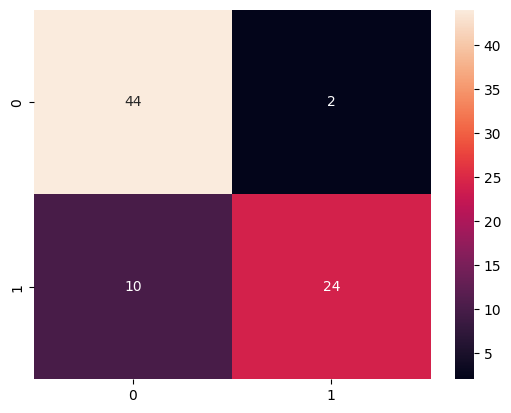

In [49]:
import seaborn as sns
sns.heatmap(matrix,annot=True)

In [50]:
tn, fp, fn, tp = confusion_matrix(ytest,ytest_pred).ravel()


In [51]:
print(tn, fp, fn, tp)

44 2 10 24


In [52]:
print("Error rate:",(fp+fn)/(tn+fp+fn+tp))

Error rate: 0.15


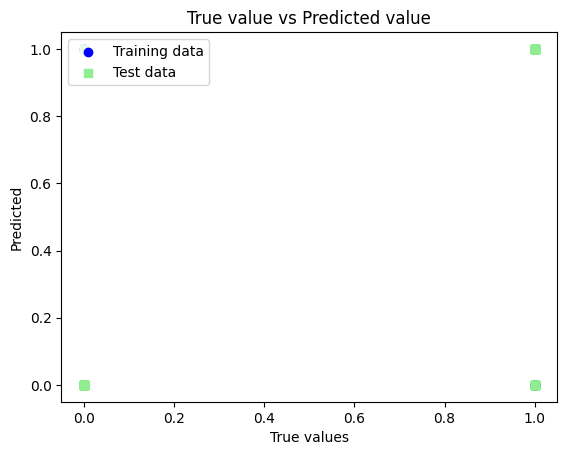

In [54]:
#Plotting logical regression model
plt.scatter(ytrain ,ytrain_pred,c='blue',marker='o',label='Training data')
plt.scatter(ytest,ytest_pred ,c='lightgreen',marker='s',label='Test data')
plt.xlabel('True values')
plt.ylabel('Predicted')
plt.title("True value vs Predicted value")
plt.legend(loc= 'upper left')
plt.plot()
plt.show()
